In [ ]:
from wikibase_api import Wikibase
import time
from Levenshtein import distance, ratio
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Generating a "baseline" result file to compare it with GT

In [ ]:
cea_target_R1 = pd.read_csv('data/SemTab/SemTab2020_Table_GT_Target/Round1/CEA_Round1_Targets.csv', header=None)

wb = Wikibase()

tablename = ""
baseline_cea = []

start = time.time()

for i in range(200000):
    if tablename != str(cea_target_R1.iloc[i, 0]):
        print(cea_target_R1.iloc[i, 0])
        tablename = str(cea_target_R1.iloc[i, 0])
        table = pd.read_csv('D:/Masterarbeit/data/SemTab/SemTab2020_Table_GT_Target/Round1/tables/'+tablename+'.csv', header=None)
    
    try:
        entityLabel = str(table.iloc[cea_target_R1.iloc[i,1], cea_target_R1.iloc[i,2]])
    except IndexError:
        print("targen not found", "(" + str(cea_target_R1.iloc[i,1])+ ", "+ str(cea_target_R1.iloc[i,2])+ ") in table "+ tablename)
        baseline_cea.append("(" + str(cea_target_R1.iloc[i,1])+ ", "+ str(cea_target_R1.iloc[i,2])+ ") in table "+ tablename) 
        continue
        
    wikiLookupResult = wb.entity.search(entityLabel, "en", limit = 4)
    
    try:
        candites = dict()
        
        for result in wikiLookupResult['search']:
            candites[result["concepturi"]] = result["label"]
            
        baseline_cea.append(str(max(candites, key = lambda k: ratio(candites[k], entityLabel ))))
    except (IndexError, ValueError) as e:
        print("für label: "+ entityLabel +" nichts gefunden")
        baseline_cea.append("nichts gefunden")
        continue
        
pickle.dump(baseline_cea, open( "baseline_cea_semtab", "wb"))
print(time.time()-start)

In [31]:
cea_gt_R1 = pd.read_csv('D:/Masterarbeit/data/SemTab/SemTab2020_Table_GT_Target/GT/CEA/CEA_Round1_gt.csv', header= None)

gt_array= cea_gt_R1.iloc[:200000,3].values
#print(gt_array)
#print(baseline_cea)

acc = accuracy_score(gt_array, baseline_cea)
recall = recall_score(gt_array, baseline_cea, average='micro')
f1 = f1_score(gt_array, baseline_cea, average='micro')

print("Accuracy: ",accuracy_score(gt_array, baseline_cea))
print("Recall (micro): ",recall)
print("F1 (micro) : ", f1)

recall = recall_score(gt_array, baseline_cea, average='macro')
f1 = f1_score(gt_array, baseline_cea, average='macro')

print("Recall(macro): ",recall)
print("F1: (macro)", f1)

Accuracy:  0.93252
Recall (micro):  0.93252
F1 (micro) :  0.9325200000000001


C:\Users\Angelos\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall(macro):  0.8400511367710303
F1: (macro) 0.8343811089874944


In [32]:
recall = recall_score(gt_array, baseline_cea, average='weighted')
f1 = f1_score(gt_array, baseline_cea, average='weighted')

print("Recall(weighted): ",recall)
print("F1: (weighted)", f1)

Recall(macro):  0.93252
F1: (macro) 0.9279286856777293


<Figure size 3600x3600 with 0 Axes>

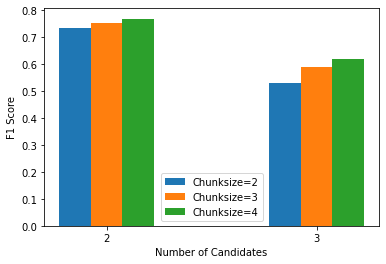

In [47]:
labels = ['2', '3']
two_chunksize = [0.733753749566511, 0.5310232064745632]#, 0.25151452372683863, 0.1996786007183901, 0.1714848760377329]
three_chunksize = [0.7529151988231942, 0.5898510487856231]#, 0.26388279753244465,  0.2070005450479288, 0.175537412587996]
four_chunksize = [0.7690016126115269, 0.6189361046239957]#, 0.2755442086342804, 0.21498222269133654, 0.18106912287288224]
five_chunksize = [0.48779328406699746, 0.33858678907895473, 0.2591298484355851, 0.21108699879488918, 0.18152291303140908]
six_chunksize = [0.4857857508577942,  0.3409245410112377, 0.2658983944159853, 0, 0]

x = np.arange(0, len(labels)*2, 2)  # the label locations
width = 0.3  # the width of the bars

plt.figure(figsize=(50,50))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, two_chunksize, width, label='Chunksize=2')
rects2 = ax.bar(x , three_chunksize, width, label='Chunksize=3')
rects3 = ax.bar(x + width, four_chunksize, width, label='Chunksize=4')
#rects4 = ax.bar(x + width, five_chunksize, width, label='Chunksize=5')
#rects5 = ax.bar(x + width*2, six_chunksize, width, label='Chunksize=6')

ax.set_ylabel('F1 Score')
ax.set_xlabel("Number of Candidates")
#ax.set_title('Scores by number of candida and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




plt.show()

[0 1 2 3]


<BarContainer object of 4 artists>

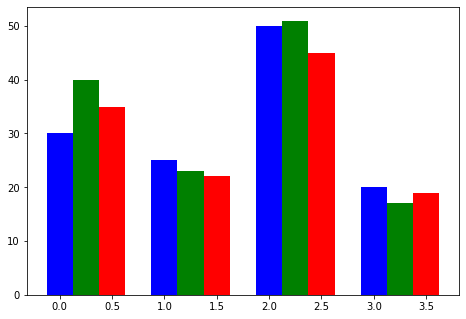

In [24]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(5)
print(X)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
#ax.bar(X + 0.75, data[0], color = 'k', width = 0.25)

In [23]:
for x in range(len()):
    print(baseline_cea[x], "=====", cea_gt_R1.iloc[x,3])         
print("(" + str(cea_target_R1.iloc[i,1])+ ", "+ str(cea_target_R1.iloc[i,2])+ ") in table "+ tablename)

http://www.wikidata.org/entity/Q2472824 ===== http://www.wikidata.org/entity/Q2472824
http://www.wikidata.org/entity/Q727 ===== http://www.wikidata.org/entity/Q9899
http://www.wikidata.org/entity/Q55 ===== http://www.wikidata.org/entity/Q55
http://www.wikidata.org/entity/Q54141196 ===== http://www.wikidata.org/entity/Q54141196
http://www.wikidata.org/entity/Q6772003 ===== http://www.wikidata.org/entity/Q6772003
http://www.wikidata.org/entity/Q350 ===== http://www.wikidata.org/entity/Q350
http://www.wikidata.org/entity/Q145 ===== http://www.wikidata.org/entity/Q145
http://www.wikidata.org/entity/Q742421 ===== http://www.wikidata.org/entity/Q742421
http://www.wikidata.org/entity/Q20922180 ===== http://www.wikidata.org/entity/Q20922180
http://www.wikidata.org/entity/Q8717 ===== http://www.wikidata.org/entity/Q8717
http://www.wikidata.org/entity/Q29 ===== http://www.wikidata.org/entity/Q29
http://www.wikidata.org/entity/Q43229 ===== http://www.wikidata.org/entity/Q43229
http://www.wikidata

#### Timemeasurments

with print and if = 25.79776382446289 sec

without print(i)  = 22.125993251800537 sec

without all prints= 22.347715139389038 

wihtout prints and wothout if = 22.37324357032776 sec



In [43]:
import requests

S = requests.Session()

URL = "https://www.wikidata.org/w/api.php"

PARAMS = {
    "action": "wbsearchentities",
    "language": "en",
    "search": "Germany",
    "format": "json",
    "limit": "1"
}
startt = time.time()
R = S.get(url=URL, params=PARAMS)
DATA = R.json()
#print(R.text)
PAGES = DATA['search']
print(time.time()-startt)
for page in PAGES:
    print(page["label"])

0.25417637825012207
Germany


In [25]:
from wikibase_api import Wikibase
import pandas as pd

wb = Wikibase()
table = pd.read_csv('D:/Masterarbeit/data/SemTab/SemTab2020_Table_GT_Target/Round1/tables/000COX8L.csv')

for label in table["col0"]:
    wikiLookupResult = wb.entity.search(label, "en", limit = 5)
    for result in wikiLookupResult["search"]:
        print(result["label"])
    print("-----------------------")

Standards of Conduct Committee - Fourth Assembly
-----------------------
Children, Young People and Education Committee - Fourth Assembly
-----------------------
Enterprise and Business Committee - Fourth Assembly
-----------------------
Constitutional and Legislative Affairs Committee - Fourth Assembly
-----------------------
Health and Social Care Committee - Fourth Assembly
-----------------------
Communities, Equality and Local Government Committee - Fourth Assembly
-----------------------
Environment and Sustainability Committee - Fourth Assembly
-----------------------


In [22]:
from wikibase_api import Wikibase

wb = Wikibase()

tmpDict = dict()

t = wb.entity.search("Amsterdam", "en", limit=5)
print(t["search"])
for result in t["search"]:
    print(result["label"], "-", result["description"])
    tmpDict[result["concepturi"]] = result["label"]
    
print(tmpDict)

[{'id': 'Q727', 'title': 'Q727', 'pageid': 1027, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q727', 'concepturi': 'http://www.wikidata.org/entity/Q727', 'label': 'Amsterdam', 'description': 'capital and most populous city of the Netherlands', 'match': {'type': 'label', 'language': 'en', 'text': 'Amsterdam'}}, {'id': 'Q9899', 'title': 'Q9899', 'pageid': 11297, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q9899', 'concepturi': 'http://www.wikidata.org/entity/Q9899', 'label': 'Amsterdam', 'description': 'municipality in the Netherlands, containing the city of Amsterdam', 'match': {'type': 'label', 'language': 'en', 'text': 'Amsterdam'}}, {'id': 'Q478456', 'title': 'Q478456', 'pageid': 450961, 'repository': 'wikidata', 'url': '//www.wikidata.org/wiki/Q478456', 'concepturi': 'http://www.wikidata.org/entity/Q478456', 'label': 'Amsterdam', 'description': 'city in Montgomery County in the state of New York, USA', 'match': {'type': 'label', 'language': 'en', 'text': '